<a href="https://colab.research.google.com/github/st064560/my_python/blob/master/orders_loreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#представим данные в виду датафрэйма
url = '/content/orders (1).csv'
df = pd.read_csv(url)
df.head()




,Заказ #,Delivery,UN,Сумма (покупки),Предварительный итог,Итог без скидок,Полный промобюджет,Промобюджет ПЛ,Промо првило,Другие корзиночные правила,Метод оплаты,Customer,Доставка на Имя,Телефон,Дата покупки,Статус,Причина отмены заказа,Дата доставки,Время доставки,Страна,Регион,Город,Улица,Код купона,В один клик,Source Type,Источник,Оформлен после,Метод доставки,Номер карты «Аэрофлот Бонус»
0,132615134,NaN,4,3169.0,4116.00,4116.0,947.0,0.0,NaN,Бесплатная доставка от 3000 руб. для России,Карта (Оплата на сайте онлайн),NaN,Елена Коновалова,+7 (950) 335-30-46,6 июля 2020 г. 14:35:10,Ожидает оплаты,NaN,10 июля 2020 г.,С 9 - до 18,Россия,Омская обл.,Омск,"пр-кт. Космический, 57 квартира 36",NaN,Нет,CPA,admitad_tracking,NaN,Курьерская доставка - DPD,NaN
1,132615125,NaN,4,1383.0,1271.60,1496.0,263.0,0.0,NaN,NaN,Карта (Оплата на сайте онлайн),415345.0,Кащеева Светлана,+7 (968) 823-44-98,6 июля 2020 г. 14:34:42,Ожидает оплаты,NaN,7 июля 2020 г.,NaN,Россия,Москва,Москва,"Боровское шоссе , дом 18 корп 3 , кВ 259",NaN,Нет,CPA,yandex,NaN,Пункт самовывоза - PickPoint,NaN
2,132615116,NaN,2,1587.0,1326.85,1561.0,274.0,0.0,NaN,NaN,Карта (Оплата на сайте онлайн),NaN,Марина Алексеева,+7 (913) 032-16-64,6 июля 2020 г. 14:34:38,Ожидает оплаты,NaN,15 июля 2020 г.,NaN,Россия,Красноярский край,Минусинск,"Тимирязева 20, кв 43",NaN,Нет,CPA,google,NaN,Пункт самовывоза - PickPoint,NaN
3,132615108,NaN,4,2674.0,2715.60,2940.0,516.0,0.0,#1867 - MINERAL 89: пул промокодов на скидку 1...,NaN,Карта (Оплата на сайте онлайн),199200.0,Светлана Рожман,+7 (962) 854-97-24,6 июля 2020 г. 14:18:23,Передано в SAP,NaN,10 июля 2020 г.,NaN,Россия,Краснодарский край,Геленджик,NaN,WO7VAN-mineral,Нет,CPA,yandex,NaN,Пункт самовывоза - PickPoint,NaN
4,132615102,NaN,6,3195.0,4323.85,4558.0,1363.0,0.0,NaN,Бесплатная доставка от 3000 руб. для России,Карта (Оплата на сайте онлайн),415339.0,Ирина Криставчук,+7 (908) 194-00-20,6 июля 2020 г. 14:11:07,Передано в SAP,NaN,8 июля 2020 г.,С 9 - до 18,Россия,Ростовская обл.,Новочеркасск,"Проспект Баклановский 184, кв 20",NaN,Нет,Пользовательская часть,Версия для компьютера,NaN,Курьерская доставка - DPD,NaN


In [28]:
#посчиатем кол-во заказов
df['Заказ #'].nunique()

1081

In [9]:
#общая сумма заказов
sales = df['Сумма (покупки)'].sum()
sales

3770399.0

In [10]:
#общая сумма рекламной кампании
promo = df['Полный промобюджет'].sum()
promo

902790.5599999999

In [17]:
k = promo/sales
k
print(round(k * 100), '% от суммы покупок занимает бюджет промо')

24.0 % от суммы покупок занимает бюджет промо


In [20]:
df['Город'].nunique()

323

In [25]:
#посмотрим, из каких город было сделано больше всего заказов
city = df['Город'].value_counts()
ns = city.head(10)
ns

Санкт-Петербург    139
Москва             126
Краснодар           36
Казань              26
Екатеринбург        21
Ростов-на-Дону      18
Самара              14
Сочи                12
Красноярск          12
Южно-Сахалинск      12
Name: Город, dtype: int64

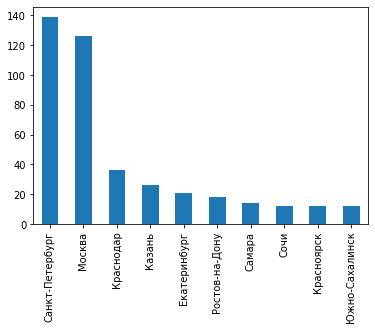

In [27]:
#Видим, что Санкт-Петеребург занимает лидирующие позиции
ns.plot.bar()

In [ ]:
df['Метод доставки'].nunique()

7

In [49]:
#Посмотрим, какие методы доставки пользуются популярностью
mk = df['Метод доставки'].value_counts()
m_df = mk.reset_index()
m_df = m_df.set_index(['index'])
m_df

,Метод доставки
index,
Курьерская доставка - CDEK,376
Пункт самовывоза - PickPoint,233
Курьерская доставка - DPD,149
Пункт самовывоза - CDEK,127
Курьерская доставка - Стриж,82
Пункт самовывоза - DPD,60
Почта России,54


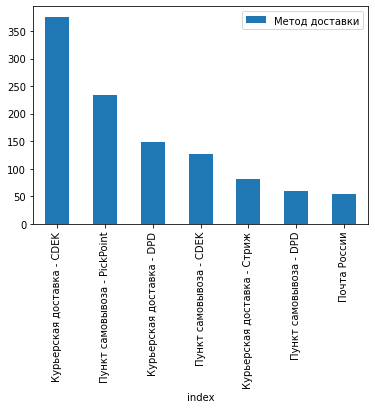

In [6]:
#Тройка лидеров: Сдек, Пикпоинт и DPD
m_df.plot.bar()

In [29]:
df.describe()

,Заказ #,Delivery,UN,Сумма (покупки),Предварительный итог,Итог без скидок,Полный промобюджет,Промобюджет ПЛ,Customer,Причина отмены заказа,Номер карты «Аэрофлот Бонус»
count,1.081000e+03,1.072000e+03,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,923.000000,0.0,1.440000e+02
mean,1.326045e+08,8.634716e+07,6.333025,3487.880666,4084.859019,4253.949639,835.143904,58.334875,324769.596966,NaN,6.830519e+13
std,1.734483e+04,1.401400e+04,2.919936,2240.787413,2716.900136,2807.409654,740.343945,265.678047,127582.529720,NaN,5.825155e+14
min,1.322992e+08,8.629614e+07,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,353.000000,NaN,3.109635e+06
25%,1.326042e+08,8.634286e+07,4.000000,2157.000000,2532.000000,2739.000000,263.000000,0.000000,231094.500000,NaN,1.883352e+08
50%,1.326106e+08,8.635384e+07,6.000000,3137.000000,3643.960000,3877.000000,699.000000,0.000000,400053.000000,NaN,1.015658e+09
75%,1.326131e+08,8.635622e+07,8.000000,4053.000000,4914.210000,5078.000000,1146.000000,0.000000,414597.500000,NaN,1.075140e+09
max,1.326151e+08,8.635756e+07,17.000000,30327.000000,37429.760000,37429.760000,7102.760000,2772.000000,415345.000000,NaN,5.559493e+15


In [30]:
df.describe(include=['object'])

,Промо првило,Другие корзиночные правила,Метод оплаты,Доставка на Имя,Телефон,Дата покупки,Статус,Дата доставки,Время доставки,Страна,Регион,Город,Улица,Код купона,В один клик,Source Type,Источник,Оформлен после,Метод доставки
count,427,762,1081,1081,1081,1081,1081,1081,633,1081,1081,1081,981,395,1081,1081,1081,89,1081
unique,25,41,3,1061,1061,1081,6,41,2,1,81,323,963,291,1,3,15,1,7
top,#1907 - Скидка 20% на всю корзину при прохожде...,Бесплатная доставка от 3000 руб. для России,Карта (Оплата на сайте онлайн),Юлия Драндрова,+7 (916) 505-24-21,3 июля 2020 г. 22:01:51,Доставляется,6 июля 2020 г.,С 9 - до 21,Россия,Санкт-Петербург,Санкт-Петербург,"Космонавтов 8 а, 31",THANKYOU,Нет,Пользовательская часть,Версия для компьютера,Skinconsult,Курьерская доставка - CDEK
freq,148,487,700,4,3,1,889,263,471,1081,139,139,3,75,1081,696,693,89,376


In [50]:
#Далее, посмотрим какая сумма заказов была отправлена каждым методом доставки
grouped_by_orders = df.groupby('Метод доставки') # sort=True
#grouped_by_orders
nk = grouped_by_orders['Сумма (покупки)'].sum()
nk

Метод доставки
Курьерская доставка - CDEK      1385832.0
Курьерская доставка - DPD        600208.0
Курьерская доставка - Стриж      319433.0
Почта России                     217570.0
Пункт самовывоза - CDEK          374665.0
Пункт самовывоза - DPD           183213.0
Пункт самовывоза - PickPoint     689478.0
Name: Сумма (покупки), dtype: float64

In [43]:
n_df = nk.reset_index()
n_df = n_df.set_index(['Метод доставки'])
n_df

,Сумма (покупки)
Метод доставки,
Курьерская доставка - CDEK,1385832.0
Курьерская доставка - DPD,600208.0
Курьерская доставка - Стриж,319433.0
Почта России,217570.0
Пункт самовывоза - CDEK,374665.0
Пункт самовывоза - DPD,183213.0
Пункт самовывоза - PickPoint,689478.0


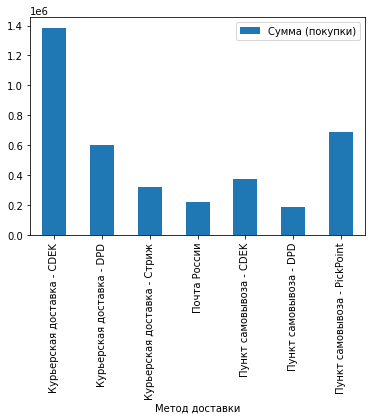

In [48]:

n_df.plot.bar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Заказ #                       1081 non-null   int64  
 1   Delivery                      1072 non-null   float64
 2   UN                            1081 non-null   int64  
 3   Сумма (покупки)               1081 non-null   float64
 4   Предварительный итог          1081 non-null   float64
 5   Итог без скидок               1081 non-null   float64
 6   Полный промобюджет            1081 non-null   float64
 7   Промобюджет ПЛ                1081 non-null   float64
 8   Промо првило                  427 non-null    object 
 9   Другие корзиночные правила    762 non-null    object 
 10  Метод оплаты                  1081 non-null   object 
 11  Customer                      923 non-null    float64
 12  Доставка на Имя               1081 non-null   object 
 13  Тел

In [ ]:
df.size

32430